##  Week2 복습과제
### 1. Wine 성분 데이터를 바탕으로 와인 품질 분류
### 결정트리, 랜덤포레스트 실습
#### 데이터셋을 다운 받아주세요!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 'train.csv'를 불러와 train_df에, 'test.csv'를 불러와 test_df에 저장하시오

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#### 1.2 train 데이터의 3 행을 통해 데이터를 파악하시오

In [3]:
train_df.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


#### 1.3 index 열이 불필요해보입니다. drop을 통해 train과 test 데이터의 index행을 삭제하세요 그리고 확인해주세요

In [4]:
traindrop=train_df.drop('index',axis=1)
testdrop=test_df.drop('index',axis=1)

In [5]:
traindrop.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [6]:
testdrop.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,white


#### 1.4 train 데이터의 결측치의 유무 여부 또는 평균, min, max, q1, q2, q3, q4 등을 describe 또는 info를 활용해 확인하시오

In [7]:
traindrop.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### 1.5 'quality'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.) value_counts 사용

In [8]:
traindrop['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

#### 1.6 train 데이터와 test 데이터의 'type'이 object로 되어있으니 인코딩을 해주세요 (레이블인코딩, encoder.fit_transform 사용)
#### 잘 인코딩이 되었는지 확인해주세요(value_counts() 사용)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
items=['type']
le=LabelEncoder()

for i in items:
    traindrop[i]=le.fit_transform(traindrop[i])
    
traindrop['type'].value_counts() 

1    4159
0    1338
Name: type, dtype: int64

In [11]:
items=['type']
le=LabelEncoder()

for i in items:
    testdrop[i]=le.fit_transform(testdrop[i])
    
testdrop['type'].value_counts() 

1    739
0    261
Name: type, dtype: int64

#### 1.7 독립변수(X)와 종속변수(y)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=traindrop.iloc[:,1:]
y=traindrop.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

#### 1.8 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
#### DecisionTreeClassifer 의 random_state = 12

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
dt_clf=DecisionTreeClassifier(random_state=12)
dt_clf.fit(X_train,y_train)

accuracy_score(y_test,dt_clf.predict(X_test))

0.6081818181818182

#### 1.9 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

params = {
    'max_depth' : [11, 14, 17, 20, 23, 26, 29],
    'min_samples_split' : [2]
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params={
    'max_depth' : [11, 14, 17, 20, 23, 26, 29], 
    'min_samples_split' : [2] 
}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최적 하이퍼 파라미터:" ,grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 17, 'min_samples_split': 2}


#### 1.10 테스트 데이터 세트에 대해 예측을 수행해주세요

In [18]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.5973


### 2. 앙상블, 랜덤 포레스트

#### 2.1 개별 모델로 로지스틱 회귀와 KNN을 사용하여 개별 모델의 학습 / 예측/ 평가를 진행해보세요. (solver="liblinear", n_neighbors = 16)

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=16)

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.5464
KNeighborsClassifier 정확도: 0.4573


#### 2.2 로지스틱 회귀와 KNN을 기반으로 하여 보팅 분류기를 만들어 본 후, 학습/예측/평가를 진행해보세요. (VotingClassifier 사용, voting='soft')

In [21]:
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.5173


#### 2.3 randomforestclassifier를 이용하여 훈련 데이터를 fit한 후, 테스트셋의 정확도를 구하세요(random_state=12, max_depth=8)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [23]:
rf_clf = RandomForestClassifier(random_state=12, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6109


#### 2.4 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.(random_state=12, n_jobs= -1, cv=2)

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {
    'n_estimators':[10, 50, 100], 'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 'min_samples_split' : [8, 16, 24, 32]
}

rf_clf = RandomForestClassifier(random_state=12, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)

최적 하이퍼 파라미터:
 {'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}


#### 2.5 2.4번에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 성능을 측정해보세요.

In [26]:
rf_clf1 = RandomForestClassifier(n_estimators=50,  min_samples_leaf=8, max_depth=14,
                                 min_samples_split=8, random_state=12)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.6118


#### 2.6 피처 주요도를 막대그래프로 시각화해보세요.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

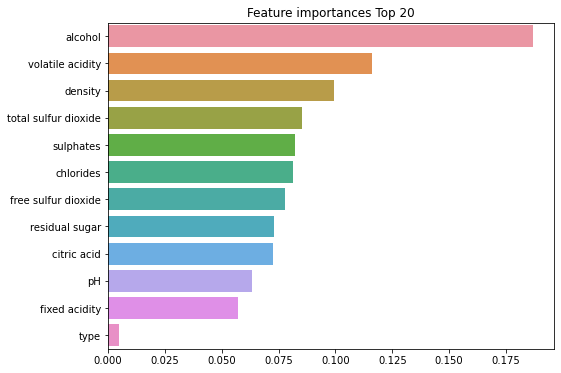

In [28]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 3. SVM 사용

#### 3.1 split된 와인 분류 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요. (C = 5)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [30]:
lin_svm=SVC(kernel='linear',C=5)
lin_svm.fit(X_train, y_train)
pred=lin_svm.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print(accuracy)

0.5481818181818182


#### 3.2 와인 품질 분류 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.

In [31]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [32]:
GS=GridSearchCV(SVC(kernel='rbf'),param)
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 40}
0.5110262178094942


#### 3.3 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.(best_estimator_ 이용)

In [34]:
estimator=GS.best_estimator_
pred=estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.5181818181818182


#### 3.4 GridSearchCV를 이용하여 최적의 gamma, C 값을 찾고 가우시안 SVM 모델을 만들어 fit 하세요.

In [35]:
params={'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [36]:
GS1=GridSearchCV(SVC(kernel='rbf'),params)
GS1.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 40}
0.5110262178094942
